**To create a Time Series model to predict the future passengers traffic**

In [1]:
## importing libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading the dataset
data= pd.read_csv("AirPassengers.csv")

# we have data of airline passengers travelled from Jan 1949 to Dec 1960

In [3]:
data.shape

(144, 2)

In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
# Month is given as string here,
# we need to convert that into date-time format


In [7]:
# Parse dastes: Parsing the date (converts the string representation of a data to Date object)
# index_col: using date column as index

data= pd.read_csv("AirPassengers.csv", parse_dates=[0], index_col="Month")

# NOTE:
# we are converting the month colun into index--> because we need only passengers feature here for time series analysis

### **Basic checks**

In [8]:
data.head()
# now month column is the index

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
data.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [10]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


### **EDA**

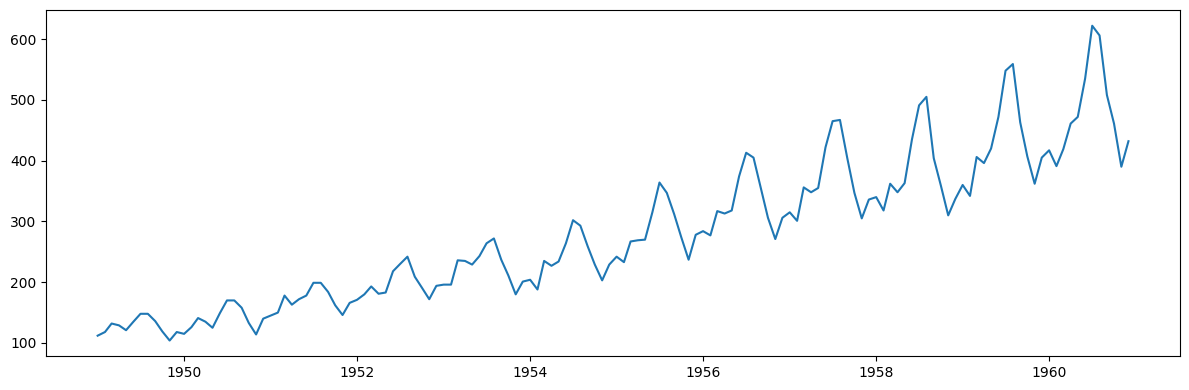

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize= (12, 4), facecolor= 'w')
plt.plot(data) # lineplot
plt.tight_layout()
plt.show()

# From this plot, the data is non-stationary

In [12]:
# we can also check the autocorrelation plot to check if the series is stationary
from statsmodels.graphics.tsaplots import plot_acf

**✅ Why Give lags=40 in plot_acf or plot_pacf?**

🔹 Because you're asking:
"Show me how far back my current value is significantly correlated with its past values — up to how many time steps?"

So:

**If you're modeling monthly data (like the AirPassengers dataset), lags=40 = 40 months = ~3.3 years**

**That’s enough to reveal:**

- Short-term structure (lags 1–12)
- Seasonal effects (lags 12, 24, etc.)
- Longer dependencies, if any

**What if you don't specify lags?**
Then:

***plot_acf(data)***
Defaults to:
***lags = min(10, len(data) // 5)***
So if you have 100 data points, you'll only get lags up to 10 — potentially missing seasonal patterns or longer-term lags.

🔍 **Real-World Implication**
Say your data has:

- Strong yearly seasonality (like air passengers → peak in December)

If You don’t specify lags

- ACF/PACF only shows lag 1 to 10 → ❌ You miss lag 12 spike

- You build a weak AR model that doesn’t account for seasonality

🧠 Model fails to capture real-world behavior.

🎯 **Strategic Lag Rule-of-Thumb**
Data Frequency-->	Recommended lags for ACF/PACF
- Daily	30–90 (to catch weekly/monthly)
- Monthly	36–48 (to catch annual cycles)
- Quarterly	12–20

🧠 TL;DR
Give lags=40 for monthly data to spot both short-term and seasonal relationships

Don't omit lags unless you're just doing a quick glance

Always tie lags to the frequency and domain knowledge of your time series


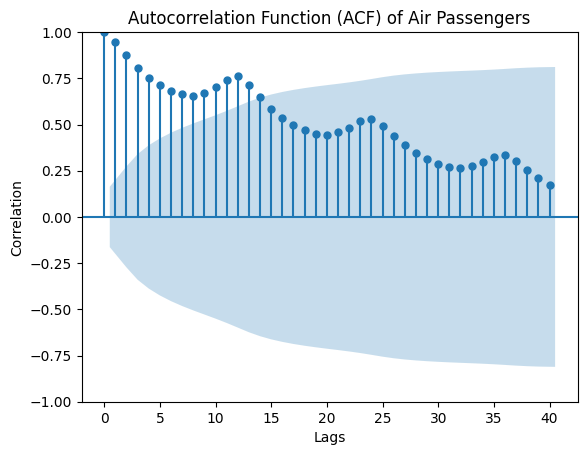

In [37]:
plot_acf(data, lags= 40)
plt.title('Autocorrelation Function (ACF) of Air Passengers')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

In [ ]:
# Since the data is non=stationary, 👉differencing is done!--> differencing of order 1
# Then the stationarity is checked.
# If still non-stationary, go for the differncing of order 2

In [15]:
# Differencing of order 1
data_diff1= data.diff(periods= 1)

In [16]:
data_diff1

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [17]:
# Remove the 1st row (Nan- due to the diff of order 1)
data_diff1= data_diff1.iloc[1:]
data_diff1

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [18]:
# Plotting the ACF again with the new series(data_diff1) as function of time lag between them

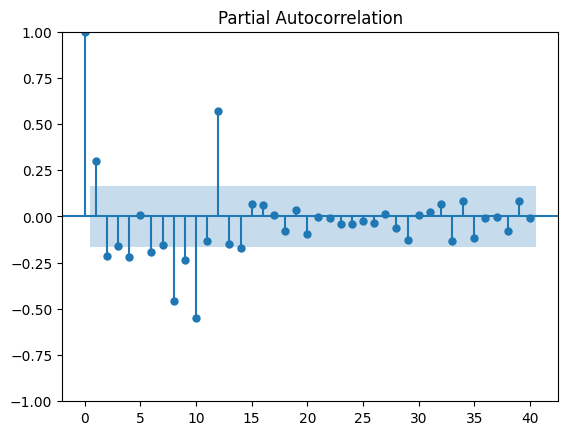

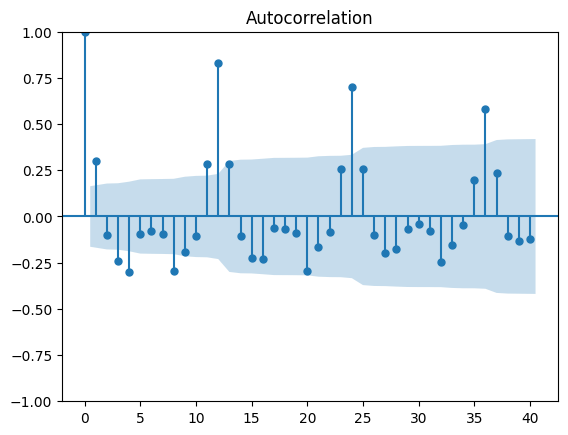

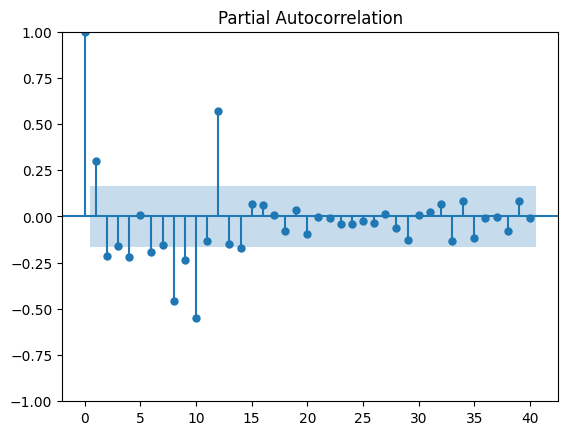

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff1, lags=40)
plot_pacf(data_diff1, lags=40)

**ACF Vs PACF in Time Series**
**ACF (Autocorrelation Function)**


In [20]:
# Observation:
# There is a few significiant spikes in lags and fast decline--> hence the series become stationary

In [21]:
# Creating and training and testing sets

# we cannot use train_test_split as it will randomly take the records for both the set
# But in time series, we take records in the given order only. (since every new value depends on the past values)


In [22]:
train_data= data_diff1[:100] # from 0th to 99th record - taken as training data
test_data= data_diff1[100:] # from 100th record to the end - testing data


In [23]:
train_data.shape

(100, 1)

In [24]:
test_data.shape

(43, 1)

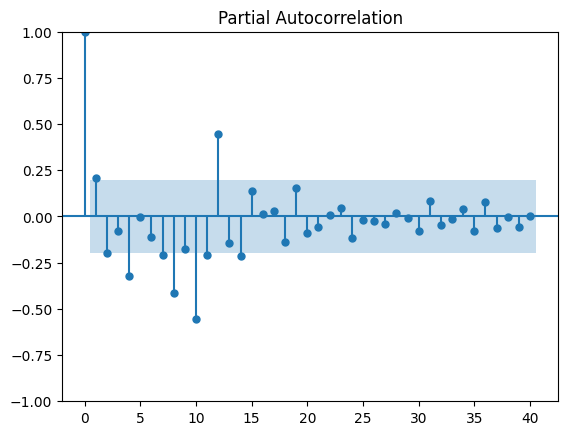

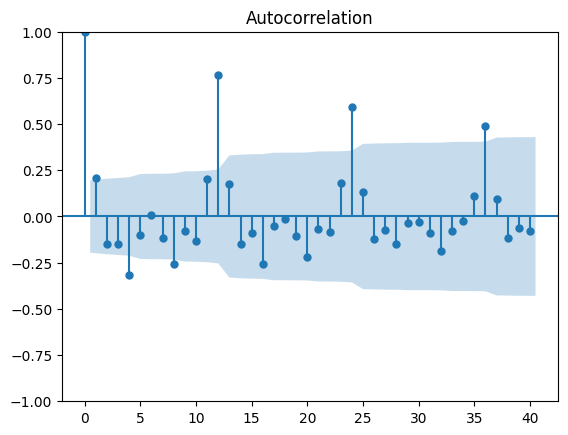

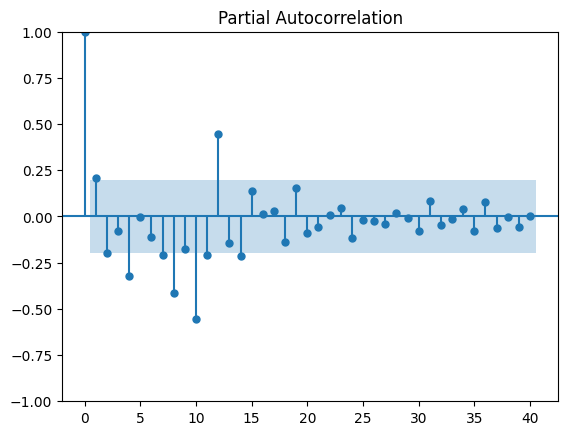

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_data, lags=40)
plot_pacf(train_data, lags=40)

In [25]:
## Applying autoregressive model

In [26]:
import warnings
warnings.filterwarnings("ignore")

- This is monthly data (we took train_data  for 100 rows so for 100 months~ 8 years)
- If we see the plot, we can the seasonal spikes at the end of each year like 12, 24 etc
- so to capture seasonal harmonics we have to give minimum 1 year(lag 12)
to around lags 24 or 36 
- But not too high to avoid overfitting here since we have only 100 rows

In [ ]:
# Lag selection (finding optimal lag order values )and model fit
from statsmodels.tsa.ar_model import ar_select_order, AutoReg

In [36]:
# Conservative upper bound to avoid overfitting
max_lag = min(36, len(train_data) // 2)  # 36 months OR half the data

# order = ar_select_order(train_data, maxlag=max_lag, ic='aic', glob=True)

# 👆If glob = True means Global Subset Selection--> it tries all the combinations of lags upto maxlag and 
# gives out the best subset (like feature selection) using AIC ,
#   it's like 2^36 ~= 68.7 billion combinations so that much hugh RAM allocation
#       will crash the process.


# 🧠 Pro Tip: Use glob=True only if:
# You have < 15 lags
# You suspect only some lags are useful
# You have enough RAM
# You want the most accurate subset model and can afford compute time

# ❌ Avoid it when:
# maxlag > 15 → Memory explodes (2^15 = 32,768 subsets)
# You have limited RAM
# You just need a quick, solid AR model (use glob=False)

order = ar_select_order(train_data, maxlag=max_lag, ic='aic', glob=False)
print("Selected lags:", order.ar_lags)


# these are the specific lag orders (in time steps) selected by the ar_select_order()
# function as optimal for the AutoReg model.  

# So lag 1, lag2...lag10, lag12, lag 13, lag 15, lag 20 all these lag values will be selected and applied
# in the AR equation!

Selected lags: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


✅ **What Does glob=True Mean in ar_select_order()?**
- **glob=True** = Global Subset Selection
This means:

- “Try all possible combinations of lag variables up to maxlag, and pick the best subset based on AIC/BIC.”

- So instead of just testing AR(1), AR(2), … AR(36), it tries:

  - [1]

  - [1, 2]

  - [1, 3]

  - [1, 2, 3]

  - [4, 12, 24]

...

- Every subset of lags up to maxlag

- This is called Best Subset Selection — extremely powerful, but combinatorially expensive.

**🤖 What Happens When glob=False?**
- “Only test full AR(p) models for p = 1 to maxlag (i.e., all lags up to p).”

- So:

  - Try AR(1): lags = [1]

  - Try AR(2): lags = [1, 2]

  - ...

  - Try AR(12): lags = [1, 2, ..., 12]

  - This is called sequential order selection — way faster and memory-safe.


In [ ]:
# Except: Lags 5, 8, 9, 11, 14, 16–19 were not selected — 
# # either because they weren't statistically significant or added noise.

# This sparse selection is due to glob=True in ar_select_order(), 
# # which allows non-contiguous lag selection (like feature selection in ML).

⚙️ How to Interpret This Practically?

- lag 1 (yesterday) is most important — this is expected in most time series.

- lag 2, lag 3, lag 4: Short memory effects — e.g., momentum.

- lag 7, lag 14: Might hint at **weekly seasonality (if daily data)**.

- lag 20: Long memory — could capture **slow trends or long-term effects.**

These lags are the most statistically useful past values to predict the current differenced value, according to AIC (or other IC) used.

**maxlag**
- It defines the maximum number of lag steps to evaluate as potential features in the AutoReg model.
  - Like "Try all combinations from lag1 up to lag 20 -- and pick the best subset based on the AIC/ BIC".

**How should you choose maxlag?**
- ✅ Rule of Thumb (Statistical & Practical)
1. Depends on data frequency
 - Daily data? --> Try maxlag= 30  (monthly pattern)
 - Hourly data? --> Try maxlag= 48 (2 days), maxlag= 168 (1 week)
 - Monthly data? --> Try maxlag = 12 (1 year)
2. Depends on data volume:
 - If you have only 100 points, maxlag= 50 will **overfit**
 - You need enough samples to estimate the coefficients reliably.
 - Safe upper bound: maxlag= len(train_data)// 10 to len(train_data) // 5
3. Depends on your goal:
 - Short-term memory: ?--> Lower lags(5-20)
 - Long-term trends? --> Include Higher lags (30 - 60+)
 - Just want best performance? --> Try a range of maxlag values, and pick the one with the lowest AIC/ BIC

🚨 **Pitfalls of blindly setting maxlag=20:**
Problem	--> What Happens
- Too low (e.g. 10)--> You miss important patterns (e.g., seasonality at lag 30)
- Too high (e.g. 100)--> Overfitting, slow computation, spurious correlations
- Just default to 20 -->May miss better models — you're leaving performance on the table

- Set it based on your data's length, frequency, and seasonal structure.

In [ ]:
# ✅ Pro-Level Strategy: Dynamic Lag Selection
# maxlag = min(40, len(train_data) // 5)
# order = ar_select_order(train_data, maxlag=maxlag, ic='aic', glob=True)

# Or if you suspect weekly/monthly seasonality in daily data:
# maxlag = 30 or 60  # Cover ~1–2 months

In [ ]:
model= AutoReg(train_data, lags= l)
ar_m= model.fit()

In [ ]:
# Predict future difference values
pred_diff= ar_m.predict(start= 100, end= 142)

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
ar_model= AutoReg(train_data, lags= []) # it takes 10 positions (10 lag values)
ar_m= ar_model.fit()

In [39]:
# y_prediction
prediction= ar_m.predict(start= 100, end= 142) # give the start index and end value index

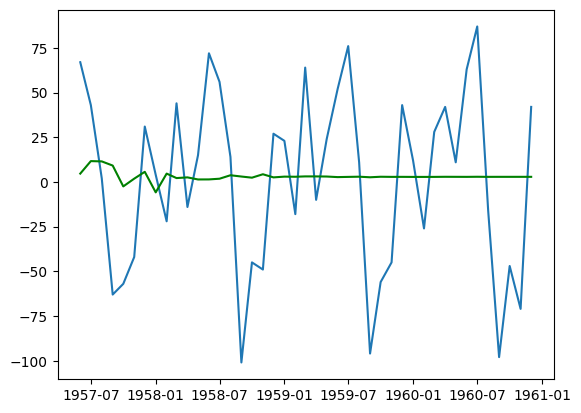

In [40]:
# comparing y_prediction and y_actual

plt.plot(test_data) # y_actual 
plt.plot(prediction, color= 'green') # y_prediction

In [27]:
# The prediction is random , not insightful at all
# so we have to give optimal values of lags and try the model again

In [29]:
from statsmodels.tsa.ar_model import ar_select_order

In [30]:
find_lags= ar_select_order(data_diff1, maxlag= 20, seasonal= False, ic= 'aic', glob= True)
print(find_lags.ar_lags)

[1, 2, 3, 4, 7, 8, 10, 12, 13, 18]
